# Python and R

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [2]:
pip install rpy2


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
# EXAMPLE PYTHON CELL

df = pd.read_csv('housing_data.csv')
df

,zip,population,borough,pct_hispanic_or_latino,pct_asian,pct_american_indian_and_alaska_native,pct_black_or_african_american,pct_white,pct_native_hawaiian_and_other_pacific_islander,pct_some_other_race,pct_two_or_more_races,pct_below_poverty
0,11368,112088,QUEENS,76.49,11.60,0.09,7.12,3.73,0.00,0.37,0.60,19.69
1,11385,107796,QUEENS,45.05,6.46,0.03,1.77,45.28,0.00,0.32,1.09,10.68
2,11211,103123,BROOKLYN,24.13,5.53,0.19,3.56,64.24,0.02,0.29,2.05,25.22
3,11208,101313,BROOKLYN,40.58,6.01,0.03,48.89,2.71,0.00,0.76,1.02,25.68
4,10467,101255,BRONX,52.08,5.68,0.35,30.43,9.24,0.02,0.76,1.44,25.20
...,...,...,...,...,...,...,...,...,...,...,...,...
184,10464,4531,BRONX,42.02,5.01,0.00,0.02,52.50,0.00,0.44,0.00,7.11
185,10004,3335,MANHATTAN,3.24,29.06,0.00,3.96,59.28,0.51,1.05,2.91,1.32
186,10006,3092,MANHATTAN,10.83,16.04,0.00,3.20,64.52,0.00,1.68,3.72,3.36
187,10162,1486,MANHATTAN,12.38,4.85,0.00,0.00,79.48,0.00,0.00,3.30,0.00


### Import packages

In [6]:
%%R

require('tidyverse')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


**Another way to import a package**

Note that sometimes you might see 

```R
library('tidyverse')
```

that also imports a library just the same as `require`

**A note about tidyverse**

The [Tidyverse](https://www.tidyverse.org/packages/) package is actually a bunch of other packages put together. So sometimes, you might see something like

```R
require('ggplot2')
require('readr')
require('dplyr')
require('tidyr')
```

This also achieves the same purpose, but sometimes we just import the pakcages we need instead of the whole tidyverse.




### Read Data


This uses a function in the readr package to read a CSV file. Check out all the other cool things readr can do (like read from an excel file or a google doc)

https://readr.tidyverse.org/

In [7]:
%%R

# Read data
df <- read_csv('housing_data.csv')
df

Rows: 189 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): borough
dbl (11): zip, population, pct_hispanic_or_latino, pct_asian, pct_american_i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 189 × 12
     zip population borough  pct_hispanic_or_latino pct_asian
   <dbl>      <dbl> <chr>                     <dbl>     <dbl>
 1 11368     112088 QUEENS                    76.5      11.6 
 2 11385     107796 QUEENS                    45.0       6.46
 3 11211     103123 BROOKLYN                  24.1       5.53
 4 11208     101313 BROOKLYN                  40.6       6.01
 5 10467     101255 BRONX                     52.1       5.68
 6 11236     100844 BROOKLYN                   7.66      2.58
 7 11226      99558 BROOKLYN                  16.4       3.07
 8 11373      94437 QUEENS                    41.7

Notice that the assignment operator is `<-` rather than `=`. Actually, both work. Check out this really angry person's guide to R syntax. There are a LOT of punctuation marks in R.

![Screenshot%202023-01-20%20at%2011.47.03%20AM.png](images/r-assignment-operator.png)

source: http://arrgh.tim-smith.us/syntax.html

# ggplot2 
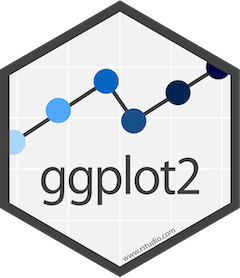


Wahoo! Those are the basics. Now let's plot some **univariate** distributions in ggplot.

### Histogram

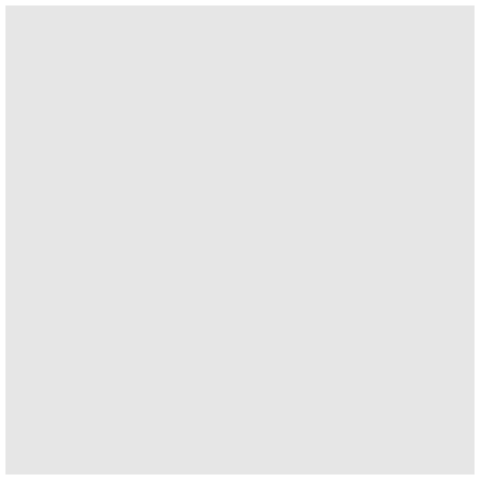

In [8]:
%%R 

# Plot
ggplot(df)


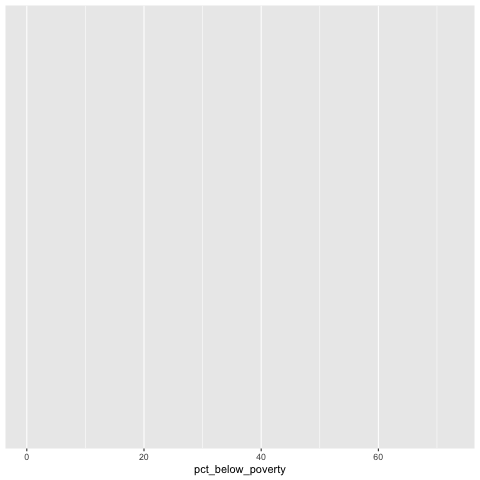

In [9]:
%%R 

# Plot + 
# Aesthetics
ggplot(df) +
    aes(x=pct_below_poverty) 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


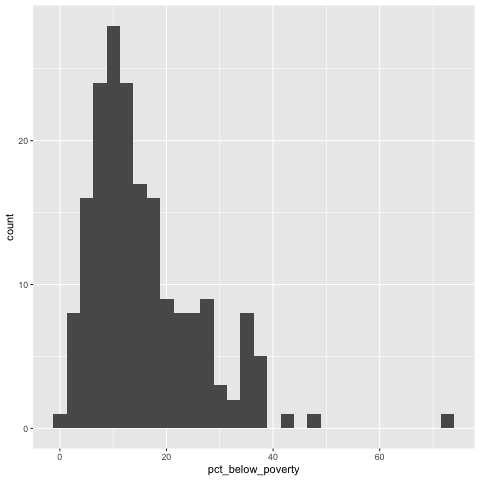

In [10]:
%%R 

# Plot +
# Aesthetics + 
# Geom
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


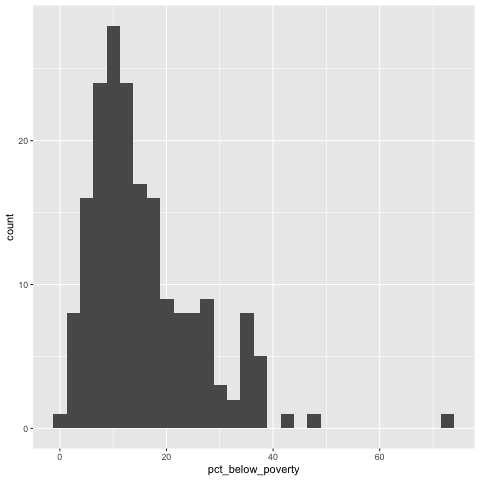

In [11]:
%%R 

# Plot +
# Aesthetics + 
# Geom + 
# Theme
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram() 

**👉 Try It**

Here is an example of a histogram (above), and the documentation for geom_histogram (link below). Read the documentation and adjust the bin sizes (there are two ways to do this)

https://ggplot2.tidyverse.org/reference/geom_histogram.html

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


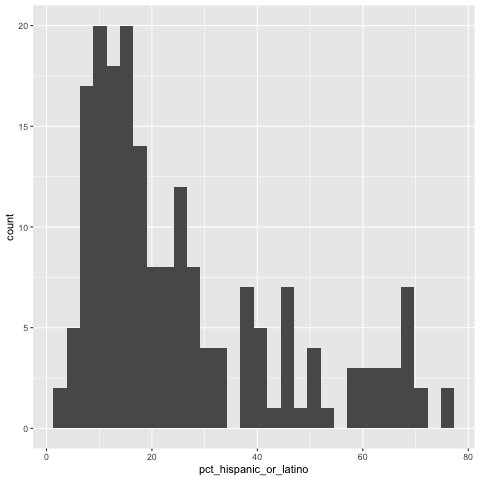

In [12]:
%%R
# copy/paste the code from the cell above
# and then make your modifications to answer
# "Try It" question
# note for myself: I chose the (pct_below_poverty) to (pct_hispanic_or_latino)

ggplot(df) + 
    aes(x=pct_hispanic_or_latino) +
    geom_histogram() 

### Dotplot

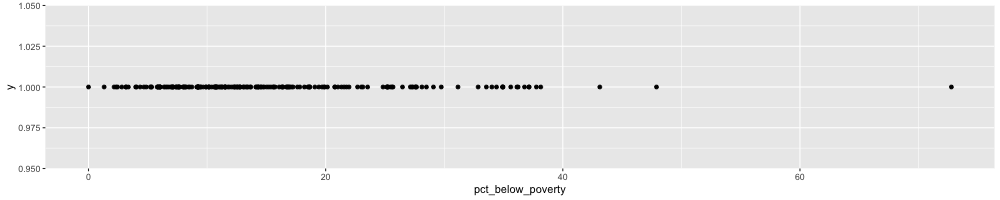

In [13]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_point() 

**👉 Try It**

Here is an example of a dotplot. It's super hard to read, check out some ggplot documentation and see if you can figure out how to make the dots bigger. Also, let's make them less opaque (more transparant) so that we can see where they overlap.



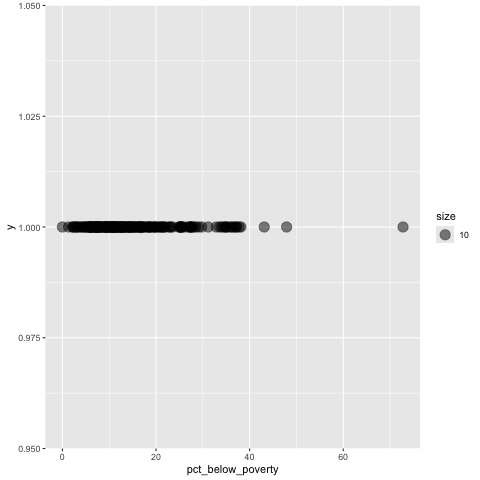

In [14]:
%%R

# copy/paste the code from the cell above
# and then make your modifications to answer
# "Try It" question


ggplot(df) + 
    aes(x=pct_below_poverty, y=1, size = 10) +
    geom_point(alpha=0.5) 

**👉 Bonus**:  what does `geom_rug()` do? 
1. try applying it to the above chart 
2. and then google the offical ggplot documentation for it

In [19]:
%%R

# copy/paste the code from the cell above
# and then make your modifications to answer
# "Bonus" question

NULL


### Dotplot (with jitter)

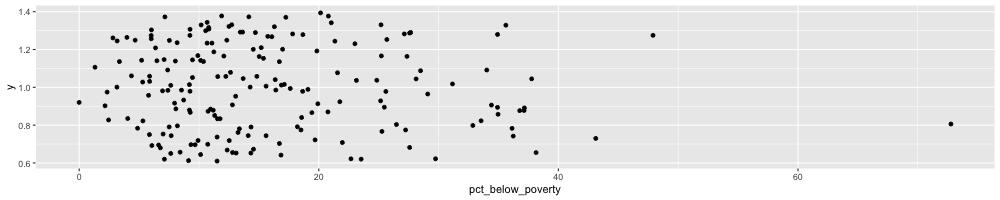

In [20]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_jitter()

**👉 Try It**

Here is an example of a dotplot (with jitter). It's a bit easier to read, but it's hard to make sense of since the y axis is meaningless. Read some documentation and learn how to:

- Add a **title** and **subtitle** that helps explain what story this data is telling. <br/>
    (_Remember, use a narrative title and a descriptive subtitle. The title should tell a story, the subtitle should say what the data is exactly._)


In [21]:
%%R

head(df)

# A tibble: 6 × 12
    zip population borough  pct_hispanic_or_latino pct_asian
  <dbl>      <dbl> <chr>                     <dbl>     <dbl>
1 11368     112088 QUEENS                    76.5      11.6 
2 11385     107796 QUEENS                    45.0       6.46
3 11211     103123 BROOKLYN                  24.1       5.53
4 11208     101313 BROOKLYN                  40.6       6.01
5 10467     101255 BRONX                     52.1       5.68
6 11236     100844 BROOKLYN                   7.66      2.58
# ℹ 7 more variables: pct_american_indian_and_alaska_native <dbl>,
#   pct_black_or_african_american <dbl>, pct_white <dbl>,
#   pct_native_hawaiian_and_other_pacific_islander <dbl>,
#   pct_some_other_race <dbl>, pct_two_or_more_races <dbl>,
#   pct_below_poverty <dbl>


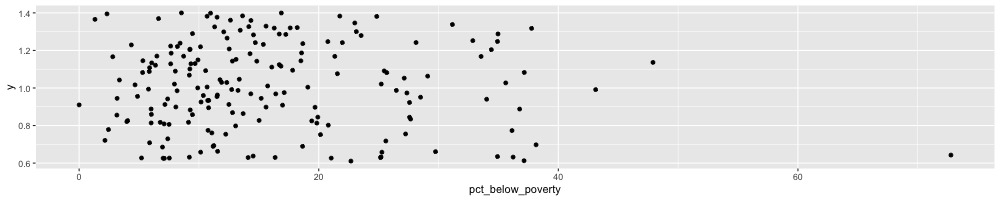

In [22]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_jitter()


**👉 Bonus**
- Remove the y axis labels (and text)
- Improve the text on the X axis label
- Change the default theme, explain why you picked the one you picked.

In [23]:
%%R

# copy/paste the code from the cell above
# and then make your modifications to answer
# "Bonus" question

NULL


### Density Plot

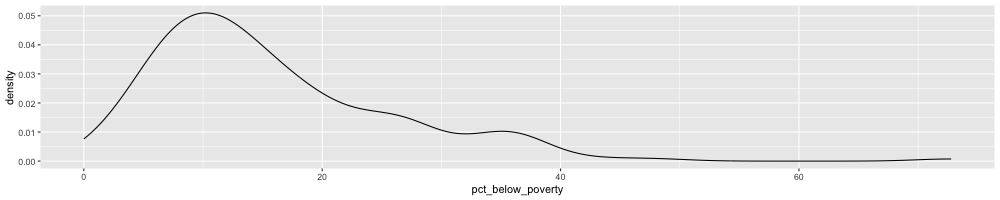

In [24]:
%%R -w 1000 -h 200
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_density()

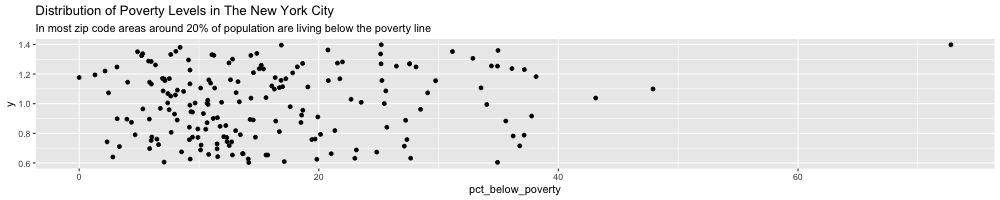

In [25]:
%%R -w 1000 -h 200

ggplot(df, aes(x = pct_below_poverty, y = 1)) +
    geom_jitter() +
    ggtitle("Distribution of Poverty Levels in The New York City", subtitle = "In most zip code areas around 20% of population are living below the poverty line")


# You can also use
# labs (
# title = ""
#    subtitle = ""


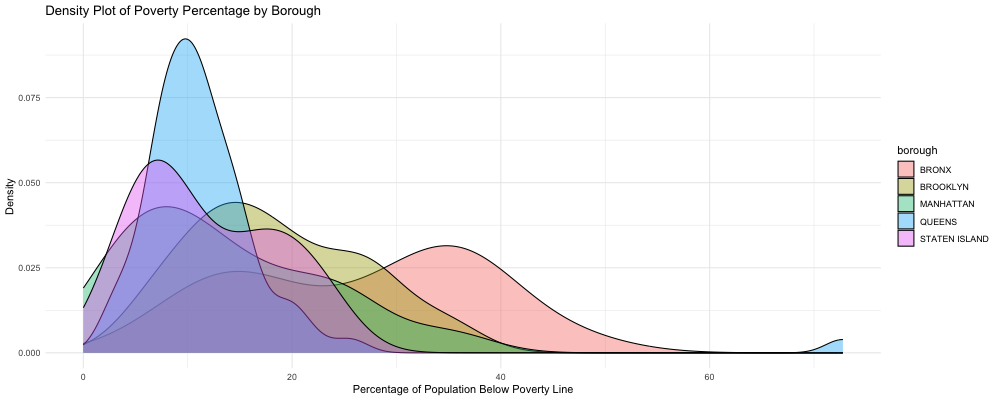

In [26]:
%%R -w 1000 -h 400

ggplot(df, aes(x = pct_below_poverty, fill = borough)) +
    geom_density(alpha = 0.4) +  # Transparent overlapping densities
    ggtitle("Density Plot of Poverty Percentage by Borough") +
    xlab("Percentage of Population Below Poverty Line") +
    ylab("Density") +
    theme_minimal()

# Yes, I used chat gpt to get out somthing so pretty, but I want to keep it here, because I just like it so much!

#### > Density Plot is the continuous and smoothed version of the Histogram estimated from the data. It is estimated through Kernel Density Estimation.

Source: https://www.geeksforgeeks.org/histograms-and-density-plots-in-python/


👉 Try It

This one is entirely theoretical. Google around and then take your best shot at answering the following questions:

1) When might you want to use a density plot versus a histogram?

> I think I could use a histogram when I need to show exact frequencies, especially for small to moderate datasets. A density plot is better for large datasets, providing a smooth, continuous representation of the distribution.

2) What is Kernel Density Estimation and how does it work?
    
> Kernel Density Estimation is a statistical technique used to estimate the probability density function of a continuous variable. I think it would be especially good for larger data sets, where a histogram might look too hard to read. 

### Box and Whisker Plot
http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization



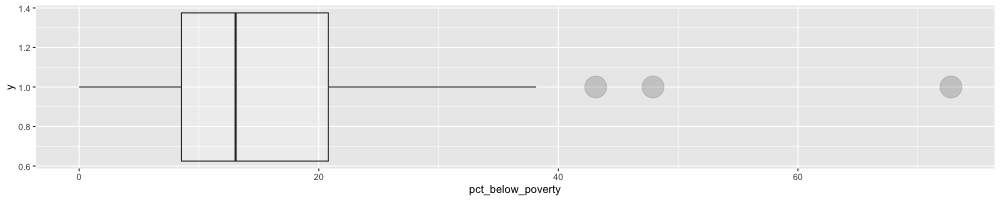

In [27]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_boxplot(alpha=.2,outlier.size=10)

Box and whisker plots aren't super easy to read. We don't always use them in reader-facing visualizations, but you'll find them a lot in scientific papers. Box and whisker plots help draw attention to outliers in relation to the median and interquartile range of the data. 

##### Interpreting a Boxplot
![](images/boxplot-image.png)
> **Not all boxplots are created equal!**
>
>"Not all boxplots are created equal. There are many different ways in which quantiles can be defined. For example, some will compute a quantile as (i−0.5)/n
 where i
 is the nth element of the batch of data and n
 is the total number of elements in that batch. This is the method implemented by Bill Cleveland and we will refer to this method as Cleveland’s quantile method. This also happens to be the method implemented by the base’s boxplot function which explains the different boxplot output compared to ggplot_boxplot in our working example:


source: https://mgimond.github.io/ES218/Week05a.html

**👉 Try It**

Our box and whisker plot is showing three outliers with very high poverty rates. See if you can:
- figure out how to annotate those so that we know which zipcodes they are
- add a title and subtitle explaining to the reader what they're looking at

**👉 Bonus**
- Can you also annotate which borough the outliers are in?

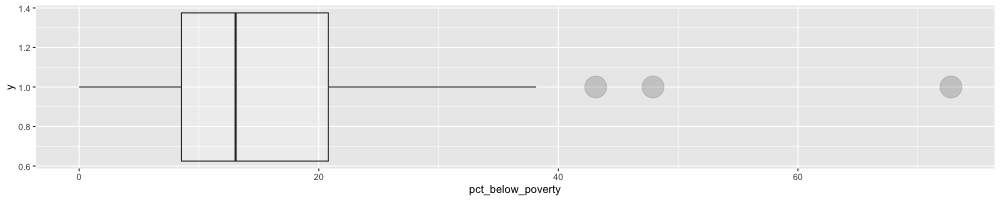

In [28]:
%%R -w 1000 -h 200

# modify this code
ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_boxplot(alpha=.2,outlier.size=10)

### Violin Plot

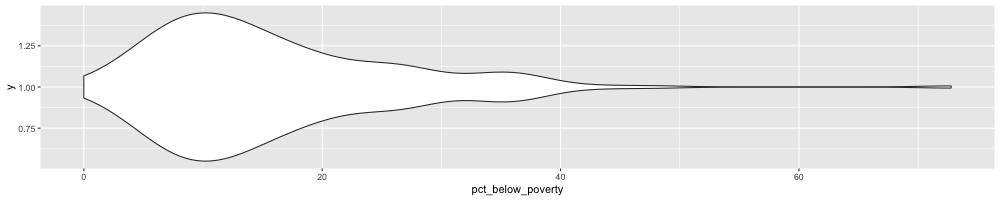

In [29]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_violin()

**👉 Try It**

Violin plots are great in that they help the reader to see nuances in the density a bit better than the box and whisker plot. However, they can be hard to interpret. Showing the dots in/on the violin plot can help.

See if you can find a way to plot the dots in or on the violin plot to help the reader better understand what they're looking it.

### Beeswarm 
(this requires installing a package)

https://github.com/eclarke/ggbeeswarm

In [31]:
%%R
install.packages('ggbeeswarm')

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Marseille) 

Selection:  India (Bengaluru)


Enter an item from the menu, or 0 to exit


Selection:  42



The downloaded binary packages are in
	/var/folders/fd/2_6_clt56hg9lxglbp6447680000gn/T//RtmpGgOhFx/downloaded_packages


also installing the dependencies ‘beeswarm’, ‘vipor’

trying URL 'https://cran.icts.res.in/bin/macosx/big-sur-arm64/contrib/4.4/beeswarm_0.4.0.tgz'
Content type 'application/x-gzip' length 83040 bytes (81 KB)
downloaded 39 KB

Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.icts.res.in/bin/macosx/big-sur-arm64/contrib/4.4/beeswarm_0.4.0.tgz' failed
In addition: Warning messages:
1: In doTryCatch(return(expr), name, parentenv, handler) :
  unable to load shared object '/Library/Frameworks/R.framework/Resources/modules//R_X11.so':
  dlopen(/Library/Frameworks/R.framework/Resources/modules//R_X11.so, 0x0006): Library not loaded: /opt/X11/lib/libSM.6.dylib
  Referenced from: <34C5A480-1AC4-30DF-83C9-30A913FC042E> /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/modules/R_X11.so
  Reason: tried: '/opt/X11/lib/libSM.6.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/X11/lib/libSM.6.dylib' (no such file), '/opt/X11/l

In [32]:
%%R
#default geom_quasirandom
ggplot(mpg,aes(class, hwy)) + geom_quasirandom()

Error in geom_quasirandom() : could not find function "geom_quasirandom"


RInterpreterError: Failed to parse and evaluate line '#default geom_quasirandom\nggplot(mpg,aes(class, hwy)) + geom_quasirandom()\n'.
R error message: 'Error in geom_quasirandom() : could not find function "geom_quasirandom"'

**👉 Try It (Bonus!)**

Install the package above and show the density as a beeswarm rather than just a jitter.
